In [9]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from pyhdf.SD import SD, SDC

In [6]:
!ncks -d Longitude,4.5.,14.496. -d Latitude,47.5.,47.5.  MYD021KM.A2013122.1140.061.2018046032403.hdf  subset_MYD021KM.A2013122.1140.061.2018046032403.hdf

ncks: ERROR dimension Longitude is not in input file


In [8]:
!ncdump -h MYD021KM.A2013122.1140.061.2018046032403.hdf

netcdf MYD021KM.A2013122.1140.061.2018046032403 {
dimensions:
	\2\*nscans\:MODIS_SWATH_Type_L1B = 406 ;
	\1KM_geo_dim\:MODIS_SWATH_Type_L1B = 271 ;
	Band_1KM_RefSB\:MODIS_SWATH_Type_L1B = 15 ;
	\10\*nscans\:MODIS_SWATH_Type_L1B = 2030 ;
	Max_EV_frames\:MODIS_SWATH_Type_L1B = 1354 ;
	Band_1KM_Emissive\:MODIS_SWATH_Type_L1B = 16 ;
	Band_250M\:MODIS_SWATH_Type_L1B = 2 ;
	Band_500M\:MODIS_SWATH_Type_L1B = 5 ;
	Band_250M = 2 ;
	Band_500M = 5 ;
	Band_1KM_RefSB = 15 ;
	Band_1KM_Emissive = 16 ;
	number\ of\ emissive\ bands = 16 ;
	detectors\ per\ 1km\ band = 10 ;
	number\ of\ scans = 203 ;
	number\ of\ 250m\ bands = 2 ;
	detectors\ per\ 250m\ band = 40 ;
	number\ of\ 500m\ bands = 5 ;
	detectors\ per\ 500m\ band = 20 ;
	number\ of\ 1km\ reflective\ bands = 15 ;
variables:
	float Latitude(\2\*nscans\:MODIS_SWATH_Type_L1B, \1KM_geo_dim\:MODIS_SWATH_Type_L1B) ;
		Latitude:units = "degrees" ;
		Latitude:valid_range = -90.f, 90.f ;
		Latitude:_FillValue = -999.f ;
		Latitude:line_numbers = "3,8" ;


In [ ]:
1. ncks -d lon,5.,6. -d lat,48.,50. input_test_rttov.nc test-rttov.nc

In [10]:
# Read dataset.
#os.chdir('/work/bb1036/b381362/dataset')
modis_file = 'MYD021KM.A2013122.1140.061.2018046032403.hdf'
file = SD(modis_file, SDC.READ)

In [11]:
print(file.info())

datasets_dic = file.datasets()

for idx, sds in enumerate(datasets_dic.keys()):
    print(idx, sds)
    


(31, 58)
0 Latitude
1 Longitude
2 EV_1KM_RefSB
3 EV_1KM_RefSB_Uncert_Indexes
4 EV_1KM_Emissive
5 EV_1KM_Emissive_Uncert_Indexes
6 EV_250_Aggr1km_RefSB
7 EV_250_Aggr1km_RefSB_Uncert_Indexes
8 EV_250_Aggr1km_RefSB_Samples_Used
9 EV_500_Aggr1km_RefSB
10 EV_500_Aggr1km_RefSB_Uncert_Indexes
11 EV_500_Aggr1km_RefSB_Samples_Used
12 Height
13 SensorZenith
14 SensorAzimuth
15 Range
16 SolarZenith
17 SolarAzimuth
18 gflags
19 EV_Band26
20 EV_Band26_Uncert_Indexes
21 Band_250M
22 Band_500M
23 Band_1KM_RefSB
24 Band_1KM_Emissive
25 Noise in Thermal Detectors
26 Change in relative responses of thermal detectors
27 DC Restore Change for Thermal Bands
28 DC Restore Change for Reflective 250m Bands
29 DC Restore Change for Reflective 500m Bands
30 DC Restore Change for Reflective 1km Bands


In [12]:
lat = file.select('Latitude')
latitude = lat[:,:]
lon = file.select('Longitude')
longitude = lon[:,:]

In [13]:
np.shape(longitude)

(406, 271)

In [14]:
longitude

array([[35.675884 , 35.390835 , 35.116325 , ...,  9.124578 ,  8.8794985,
         8.625549 ],
       [35.673347 , 35.387905 , 35.113033 , ...,  9.08714  ,  8.84123  ,
         8.586411 ],
       [35.669426 , 35.38387  , 35.108875 , ...,  9.082918 ,  8.837703 ,
         8.583616 ],
       ...,
       [34.605858 , 34.18043  , 33.768627 , ..., -3.0598266, -3.3685663,
        -3.6853971],
       [34.59525  , 34.170452 , 33.758606 , ..., -3.0683258, -3.3760862,
        -3.6917505],
       [34.603275 , 34.176346 , 33.764202 , ..., -3.1427853, -3.4543571,
        -3.7708364]], dtype=float32)

In [15]:
longitude[405]

array([34.603275  , 34.176346  , 33.764202  , 33.36638   , 32.982243  ,
       32.609943  , 32.24979   , 31.90098   , 31.562891  , 31.234919  ,
       30.916506  , 30.60603   , 30.303917  , 30.010286  , 29.72705   ,
       29.44927   , 29.178877  , 28.916224  , 28.658165  , 28.40788   ,
       28.162275  , 27.922216  , 27.687485  , 27.45786   , 27.23314   ,
       27.013113  , 26.797598  , 26.586416  , 26.379402  , 26.176397  ,
       25.976704  , 25.781633  , 25.589674  , 25.401442  , 25.216389  ,
       25.03431   , 24.8553    , 24.679377  , 24.506248  , 24.336012  ,
       24.168697  , 24.003637  , 23.84137   , 23.681122  , 23.523596  ,
       23.368029  , 23.215176  , 23.064388  , 22.91602   , 22.768953  ,
       22.624073  , 22.481346  , 22.34033   , 22.200941  , 22.063278  ,
       21.927305  , 21.792963  , 21.660202  , 21.52901   , 21.399292  ,
       21.271038  , 21.144213  , 21.018713  , 20.894487  , 20.771868  ,
       20.650333  , 20.530033  , 20.410921  , 20.292986  , 20.17

##### np.unique(longitude)

In [40]:
plt.scatter(longitude[0,:], alpha=0.5)
plt.title('Scatter plot lontitud')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


TypeError: scatter() missing 1 required positional argument: 'y'

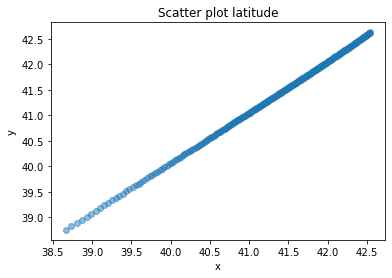

In [29]:
np.shape(latitude)
plt.scatter(latitude[0], latitude[1], alpha=0.5)
plt.title('Scatter plot latitude')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [56]:
data_raw_250_Ref = file.select('EV_250_Aggr1km_RefSB')
data_raw_500_Ref = file.select('EV_500_Aggr1km_RefSB')
data_raw_1_Ref = file.select('EV_1KM_RefSB')
data_raw_1_Ems = file.select('EV_1KM_Emissive')

In [57]:
bands_250_Ref = file.select('Band_250M')
print(bands_250_Ref.attributes())
band_nums_250_Ref=bands_250_Ref.get()
print(f'here are the modis channels in the EV_250_Aggr1km_RefSB dataset \n{band_nums_250_Ref}')

bands_500_Ref = file.select('Band_500M')
print(bands_500_Ref.attributes())
band_nums_500_Ref=bands_500_Ref.get()
print(f'here are the modis channels in the EV_500_Aggr1km_RefSB dataset \n{band_nums_500_Ref}')

bands_1_Ref = file.select('Band_1KM_RefSB')
print(bands_1_Ref.attributes())
band_nums_1_Ref=bands_1_Ref.get()
print(f'here are the modis channels in the EV_1KM_RefSB dataset \n{band_nums_1_Ref}')


bands_1_Ems = file.select('Band_1KM_Emissive')
print(bands_1_Ems.attributes())
band_nums_1_Ems=bands_1_Ems.get()
print(f'here are the modis channels in the EV_1KM_Emissive dataset \n{band_nums_1_Ems}')

{'long_name': '250M Band Numbers for Subsetting'}
here are the modis channels in the EV_250_Aggr1km_RefSB dataset 
[1. 2.]
{'long_name': '500M Band Numbers for Subsetting'}
here are the modis channels in the EV_500_Aggr1km_RefSB dataset 
[3. 4. 5. 6. 7.]
{'long_name': '1KM Reflective Solar Band Numbers for Subsetting'}
here are the modis channels in the EV_1KM_RefSB dataset 
[ 8.   9.  10.  11.  12.  13.  13.5 14.  14.5 15.  16.  17.  18.  19.
 26. ]
{'long_name': '1KM Emissive Band Numbers for Subsetting'}
here are the modis channels in the EV_1KM_Emissive dataset 
[20. 21. 22. 23. 24. 25. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.]


In [94]:
# Retrieve attributes.
#Name_scale='reflectance_scales'
#Name_offset='reflectance_offsets'
Name_scale='radiance_scales'
Name_offset='radiance_offsets'

scales_250_Ref=data_raw_250_Ref.attributes()[Name_scale]
offsetss_250_Ref=data_raw_250_Ref.attributes()[Name_offset]

scales_500_Ref=data_raw_500_Ref.attributes()[Name_scale]
offsetss_500_Ref=data_raw_500_Ref.attributes()[Name_offset]

scales_1_Ref=data_raw_1_Ref.attributes()[Name_scale]
offsetss_1_Ref=data_raw_1_Ref.attributes()[Name_offset]

Name_scale='radiance_scales'
Name_offset='radiance_offsets'
scales_1_Ems=data_raw_1_Ems.attributes()[Name_scale]
offsetss_1_Ems=data_raw_1_Ems.attributes()[Name_offset]



In [95]:
data_raw_250_Ref_correct = np.zeros(np.shape(data_raw_250_Ref))
np.shape(data_raw_250_Ref_correct)

data_raw_500_Ref_correct = np.zeros(np.shape(data_raw_500_Ref))
np.shape(data_raw_500_Ref_correct)

data_raw_1_Ref_correct = np.zeros(np.shape(data_raw_1_Ref))
np.shape(data_raw_1_Ref_correct)

data_raw_1_Ems_correct = np.zeros(np.shape(data_raw_1_Ems))
np.shape(data_raw_1_Ems_correct)


(16, 2030, 1354)

In [96]:
n_bands_250_Ref=len(band_nums_250_Ref)
n_bands_500_Ref=len(band_nums_500_Ref)
n_bands_1_Ref=len(band_nums_1_Ref)
n_bands_1_Ems=len(band_nums_1_Ems)

for band in range(n_bands_250_Ref):
    data_raw_250_Ref_correct[band] = (data_raw_250_Ref[band] - offsetss_250_Ref[band]) * scales_250_Ref[band] 

for band in range(n_bands_500_Ref):
    data_raw_500_Ref_correct[band] = (data_raw_500_Ref[band] - offsetss_500_Ref[band]) * scales_500_Ref[band] 

for band in range(n_bands_1_Ref):
    data_raw_1_Ref_correct[band] = (data_raw_1_Ref[band] - offsetss_1_Ref[band]) * scales_1_Ref[band] 

for band in range(n_bands_1_Ems):
    data_raw_1_Ems_correct[band] = (data_raw_1_Ems[band] - offsetss_1_Ems[band]) * scales_1_Ems[band] 


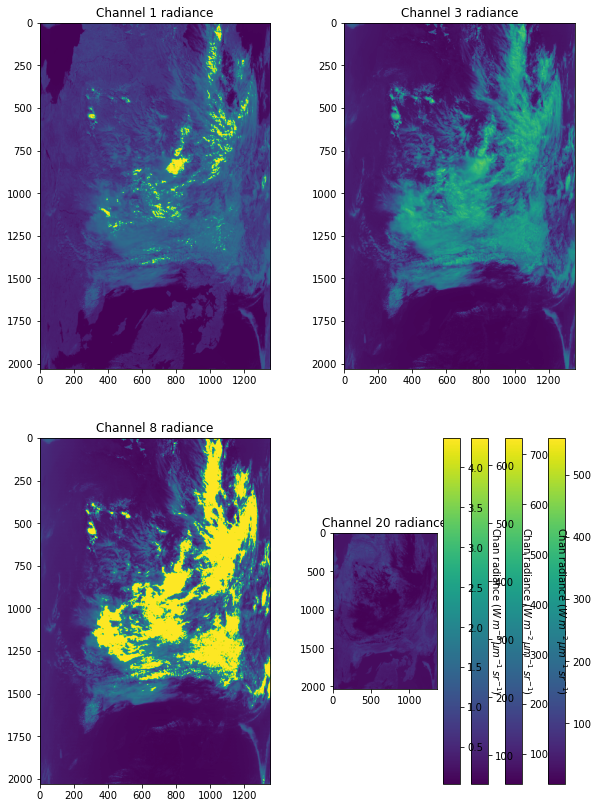

In [97]:
fig,axs = plt.subplots(2,2,figsize = (10,14))
((ax1, ax2), (ax3, ax4)) = axs
CS1=ax1.imshow(data_raw_250_Ref_correct[1]) #channel 30

cax1=fig.colorbar(CS1)
ax1.set_title('Channel 1 radiance')

CS2=ax2.imshow(data_raw_500_Ref_correct[0]) #channel 30
cax2=fig.colorbar(CS2)
ax2.set_title('Channel 3 radiance')
out2=cax2.ax.set_ylabel('Chan radiance $(W\,m^{-2}\,\mu m^{-1}\,sr^{-1})$')
out2.set_verticalalignment('bottom')
out2.set_rotation(270)


CS3=ax3.imshow(data_raw_1_Ref_correct[0]) #channel 30
cax3=fig.colorbar(CS3)
ax3.set_title('Channel 8 radiance')
out3=cax3.ax.set_ylabel('Chan radiance $(W\,m^{-2}\,\mu m^{-1}\,sr^{-1})$')
out3.set_verticalalignment('bottom')
out3.set_rotation(270)

CS4=ax4.imshow(data_raw_1_Ems_correct[0]) #channel 30
cax4=fig.colorbar(CS4)
ax4.set_title('Channel 20 radiance')
out4=cax4.ax.set_ylabel('Chan radiance $(W\,m^{-2}\,\mu m^{-1}\,sr^{-1})$')
out4.set_verticalalignment('bottom')
out4.set_rotation(270)

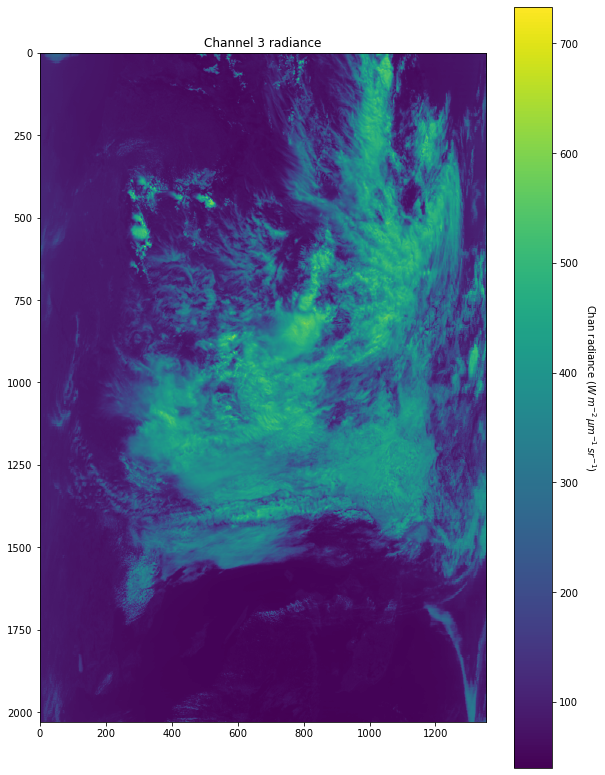

In [98]:
fig,ax2 = plt.subplots(1,1,figsize = (10,14))

CS2=ax2.imshow(data_raw_500_Ref_correct[0]) #channel 30
cax2=fig.colorbar(CS2)
ax2.set_title('Channel 3 radiance')
out2=cax2.ax.set_ylabel('Chan radiance $(W\,m^{-2}\,\mu m^{-1}\,sr^{-1})$')
out2.set_verticalalignment('bottom')
out2.set_rotation(270)

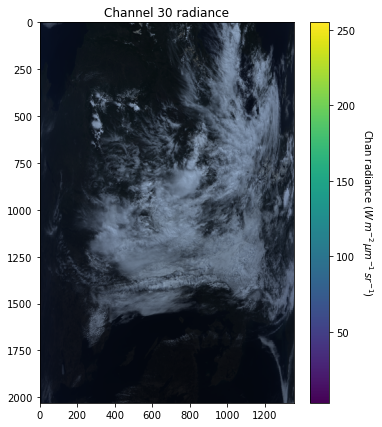

In [100]:

data_RGB = np.zeros((2030, 1354,3))
np.shape(data_RGB)
data_RGB[:,:,0]=data_raw_250_Ref_correct[0,:,:]
data_RGB[:,:,1]=data_raw_500_Ref_correct[1,:,:]
data_RGB[:,:,2]=data_raw_500_Ref_correct[0,:,:]


fig,ax = plt.subplots(1,1,figsize = (6,7))
CS=ax.imshow(((data_RGB/data_RGB.max())*255).astype(np.uint8)) 
cax=fig.colorbar(CS)
ax.set_title('Channel 30 radiance')
#
# add a label to the colorbar and flip it around 270 degrees
#
out=cax.ax.set_ylabel('Chan radiance $(W\,m^{-2}\,\mu m^{-1}\,sr^{-1})$')
out.set_verticalalignment('bottom')
out.set_rotation(270)


In [ ]:
https://oceancolor.gsfc.nasa.gov/forum/oceancolor/topic_show.pl?tid=1049  #info about lat,lon
    https://stackoverflow.com/questions/29135885/netcdf4-extract-for-subset-of-lat-lon

In [ ]:
#PCA
https://www.sciencedirect.com/science/article/abs/pii/S0957417420301020
    https://link.springer.com/article/10.1007/s12524-018-0803-1  #'GET THE PAPER'++
        
        https://medium.com/analytics-vidhya/principal-component-analysis-pca-with-code-on-mnist-dataset-da7de0d07c22 #reader

In [ ]:
#debo trabajar con radiances o q?

In [ ]:
# more pca https://www.kaggle.com/akhileshrai/intro-cnn-pytorch-pca-tnse-isomap

In [ ]:
https://towardsdatascience.com/principal-component-analysis-in-depth-understanding-through-image-visualization-892922f77d9f

In [ ]:
https://notebook.community/dennissergeev/classcode/notebooks/01_MODIS_L1B
    http://colah.github.io/posts/2014-10-Visualizing-MNIST/

In [ ]:
https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/modis-data-in-python/
    https://towardsdatascience.com/pca-with-numpy-58917c1d0391
    https://towardsdatascience.com/dimensionality-reduction-of-a-color-photo-splitting-into-rgb-channels-using-pca-algorithm-in-python-ba01580a1118
        https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html
            https://ccplot.org/pub/resources/Aqua/MODIS%20Level%201B%20Product%20User%20Guide.pdf
                https://modis.gsfc.nasa.gov/about/specifications.php

In [ ]:
Histograma https://www.geeksforgeeks.org/plot-2-d-histogram-in-python-using-matplotlib/